In [1]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re

# Step 1: Upload the image
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving noisy_image_sample.jpg to noisy_image_sample.jpg


In [3]:
# Step 2: Read and convert to grayscale
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Denoising (Non-local Means)
denoised = cv2.fastNlMeansDenoising(gray, None, h=30, templateWindowSize=7, searchWindowSize=21)

# Step 4: Contrast enhancement using Histogram Equalization
equalized = cv2.equalizeHist(denoised)

# Step 5: Adaptive Thresholding
thresholded = cv2.adaptiveThreshold(equalized, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

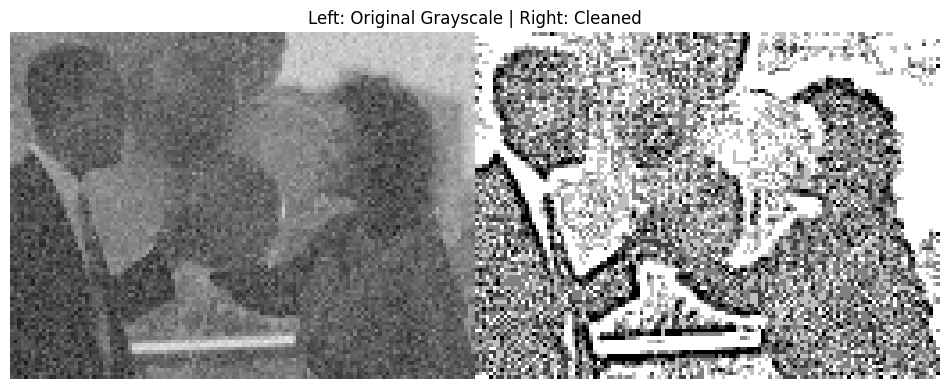

In [4]:
# Step 6: Save and Download the cleaned image
output_filename = 'cleaned_image.jpg'
cv2.imwrite(output_filename, thresholded)
files.download(output_filename)

# Step 7: Display original vs cleaned
comparison = cv2.hconcat([
    cv2.resize(gray, (0, 0), fx=0.5, fy=0.5),
    cv2.resize(thresholded, (0, 0), fx=0.5, fy=0.5)
])
plt.figure(figsize=(12, 6))
plt.imshow(comparison, cmap='gray')
plt.title("Left: Original Grayscale | Right: Cleaned")
plt.axis('off')
plt.show()